In [8]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("images.bin","rb") as f:
    d = pickle.load(f)

In [10]:
features = []
target = []
for i in range(0,10):
    for j in d[i][1]:
        features.append(list(j))
        target.append(i)

In [11]:
import numpy as np

In [25]:
features_np = np.asarray(features)
target_np = np.asarray(target)

In [ ]:
print(target_np[10000])
plt.imshow(features_np[10000].reshape(28,28),cmap="gray")

In [26]:
features_np = features_np/255.0

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_np, target_np, test_size=0.30)

In [23]:
print(X_train.shape)

(29400, 784)


In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [57]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
919/919 [==============================] - 2s 3ms/step - loss: 0.5153 - accuracy: 0.8436 - val_loss: 0.2105 - val_accuracy: 0.9372
Epoch 2/10
919/919 [==============================] - 2s 3ms/step - loss: 0.2367 - accuracy: 0.9294 - val_loss: 0.1454 - val_accuracy: 0.9590
Epoch 3/10
919/919 [==============================] - 2s 3ms/step - loss: 0.1815 - accuracy: 0.9450 - val_loss: 0.1276 - val_accuracy: 0.9612
Epoch 4/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1502 - accuracy: 0.9546 - val_loss: 0.1282 - val_accuracy: 0.9629
Epoch 5/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1265 - accuracy: 0.9612 - val_loss: 0.1139 - val_accuracy: 0.9678
Epoch 6/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1118 - accuracy: 0.9661 - val_loss: 0.1157 - val_accuracy: 0.9666
Epoch 7/10
919/919 [==============================] - 2s 3ms/step - loss: 0.1019 - accuracy: 0.9694 - val_loss: 0.1110 - val_accuracy: 0.9683
Epoch 

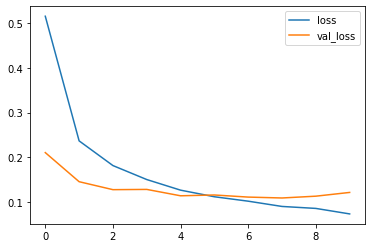

In [58]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
predictions = model.predict(np.asarray([X_test[1]]))

In [71]:
np.where(predictions == predictions.max())

(array([0]), array([8]))

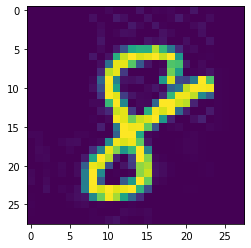

In [72]:
plt.imshow(X_test[1].reshape(28,28))

In [107]:
#model.save('')

In [78]:
from PIL import Image

In [87]:
image = Image.open('test.jpg')
image = image.convert('1')
image = image.resize((28,28))
np_image = np.asarray(image)

In [97]:
p = model.predict(np.asarray([np_image.flatten()]))

In [105]:
def prediction(p):
  d = {}
  ct=0
  for i in p.flatten():
    d[ct] = i
    ct+=1
  return d

In [106]:
prediction(p)

{0: 0.0,
 1: 0.0,
 2: 1.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}